## Closed Formed Solution in Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as ps
from sklearn.datasets import make_regression

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


### Generate Dataset

In [17]:
X,Y = make_regression(n_samples=400,n_features=1,n_informative=1,noise=1.8,random_state=11)

In [18]:
print(X.shape)
print(Y.shape)

(400, 1)
(400,)


In [19]:
# reshaping Y vector to matrix 
Y = Y.reshape((-1,1))
print(Y.shape)

(400, 1)


### Normalising Dataset

In [20]:
X = (X-X.mean())/X.std()

### Visualize 

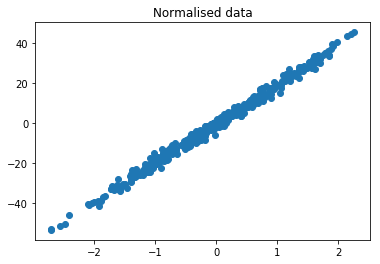

In [21]:
plt.figure()
plt.scatter(X,Y)
plt.title("Normalised data")
plt.show()

In [23]:
ones = np.ones((X.shape[0],1))
X_ = np.hstack((X,ones))
print(X.shape)
print(X_[:5,:])

(400, 1)
[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [36]:
def predict(X,theta):
    return np.dot(X,theta)


def getThetaClosedForm(X,Y):
    Y = np.mat(Y)
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T,Y)
    
    theta = np.linalg.pinv(firstPart)*secondPart
    return theta

In [37]:
theta = getThetaClosedForm(X_,Y)
print(theta)

[[19.45877082]
 [-0.29187892]]


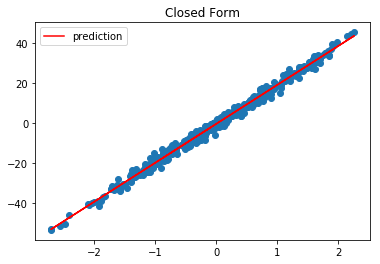

In [39]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X,predict(X_,theta),color='red',label='prediction')
plt.title("Closed Form")
plt.legend()
plt.show()